# Machine learning - Assignment 2
#### Laptop price prediction with multiple linear regression

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#### Data importing
_Data importing from the csv file._

In [2]:
data_df = pd.read_csv('./datasets/laptop-price-specs.csv')
data_df.head()
data_df.count()

Company        1302
TypeName       1302
Ram            1302
OpSys          1302
Weight         1302
TouchScreen    1302
IPS            1302
PPI            1302
CPU_name       1302
HDD            1302
SSD            1302
Gpu brand      1302
Price          1302
dtype: int64

#### Prior data visualization

<AxesSubplot:xlabel='Price', ylabel='Count'>

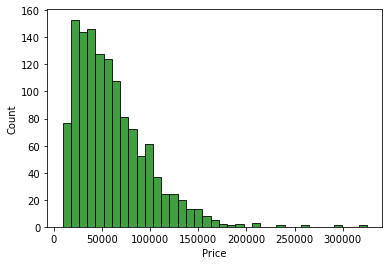

In [3]:
# Plotting a actual price distribution.
sn.histplot(data_df['Price'],color='green')

i:\Accedemic Softwares and Tools\Annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

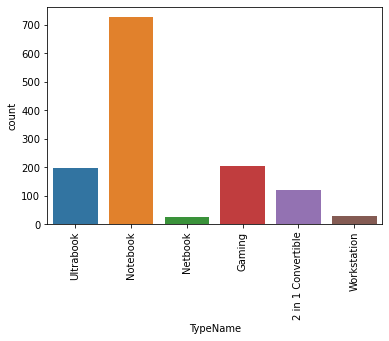

In [4]:
# Information related to various type of laptops.
sn.countplot(data_df['TypeName'])
plt.xticks(rotation = 'vertical')

i:\Accedemic Softwares and Tools\Annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


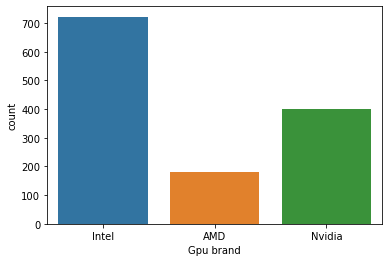

In [5]:
# Plotting GPU manufacture information.
sn.countplot(data_df['Gpu brand'])
plt.show()


In [6]:
# Extracting CPU manufacture details from the dataset.
cpu_manufacture = data_df['CPU_name'].str.split(' ',n = 1,expand=True)
cpu_manufacture.head()
data_df['CPU_manufacture'] = cpu_manufacture[0]

<AxesSubplot:ylabel='None'>

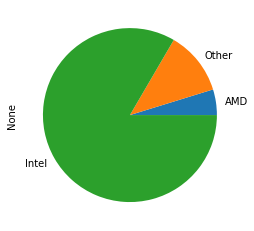

In [7]:
# Plotting the CPU manufacture details
cpu_value = data_df.value_counts('CPU_manufacture')
cpu_value.sort_values().plot(kind='pie')

#### Data augmentation - Experiment
_Removing columns from the dataframes, Converting string datato numeric_

In [8]:
# Converting the label of notebook type into numeric identifier
notebook_type = data_df.value_counts("TypeName")
print(notebook_type)

# Method to create numeric values.
def type_convert_numeric(value):
    data_df['Type'] = np.select(
        condlist=[
            data_df['TypeName'] == "Notebook",
            data_df['TypeName'] == "Gaming",
            data_df['TypeName'] == "Ultrabook",
            data_df['TypeName'] == "2 in 1 Convertible",
            data_df['TypeName'] == "Workstation",
            data_df['TypeName'] == "Netbook",
        ],
        choicelist=[
            0,
            1,
            2,
            3,
            4,
            5
        ],
        default=0
    )

listTypes = ["Notebook", "Gaming", "Ultrabook", "2 in 1 Convertible", "Workstation", "Netbook"]
for value in listTypes:
    type_convert_numeric(value)

data_df.head()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
dtype: int64


,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture,Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel,2
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel,2
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel,0
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel,2
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel,2


In [9]:
# Drop columns in Dataframe.
data_df.drop(['Type'], axis=1)

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,33992.6400,Intel
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,79866.7200,Intel
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,12201.1200,Other
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,40705.9200,Intel


In [10]:
# Check for NULL values before partitioning.
data_df.isnull().sum()


Company            0
TypeName           0
Ram                0
OpSys              0
Weight             0
TouchScreen        0
IPS                0
PPI                0
CPU_name           0
HDD                0
SSD                0
Gpu brand          0
Price              0
CPU_manufacture    0
Type               0
dtype: int64

In [17]:
# Newer data splitting method.
train = data_df.drop(['Price','Type'], axis=1)
# Only change here is usage of np.log().
testing = np.log(data_df['Price'])

In [18]:
# Validating the X dataset
train

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,CPU_manufacture
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Intel
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Intel
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Intel
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Other
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Intel


In [19]:
# Validating the Y dataset
testing

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1297    10.433899
1298    11.288115
1299     9.409283
1300    10.614129
1301     9.886358
Name: Price, Length: 1302, dtype: float64

In [20]:
# Split data into train test validation.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, testing, test_size=0.15, random_state=6)

#### Prepare pipeline and mapper for the data.

In [21]:
mapper = {i:value for i,value in enumerate(x_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand',
 12: 'CPU_manufacture'}

#### Define the machine learning model

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Select the number of columns.
selected_columns = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11,12])
],remainder='passthrough')

# Create the model as a another layer in the pipeline
linear_regression_model = LinearRegression(positive='True')

# Create the pipeline to connect the layers.
pipe = Pipeline([
    ('step1',selected_columns),
    ('step2',linear_regression_model)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',metrics.r2_score(y_test,y_pred))

R2 score 0.853165881611648


#### Other Machine learning model for performance comparison.

In [ ]:
# Creating a LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
# Creating a ElasticNet model from sklearn.
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=42, selection='cyclic').fit(x_train, y_train)

In [ ]:
# Creating a Logistic Regression model from sklearn.
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(random_state=2, max_iter=5000, solver="adam").fit(x_train, y_train)

In [ ]:
# Creating a DecisionTree classifier
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=7)
model.fit(x_train, y_train)

In [ ]:
# RandomForest model Regression model.
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
model = RandomForestRegressor(random_state=42, max_depth=5,
                                       n_estimators=100, oob_score=True)
model.fit(x_train, y_train)

#### Get prediction and evaluate the accuracy

In [23]:
# Predict results with the trained model
y_pred = pipe.predict(x_test)
print(y_pred)

[11.16646    10.91154946 11.49134407 11.20773988 10.56723925 11.17495248
 10.81142091 11.45801031 10.95690867 11.40600458 10.92714031 10.89436313
 10.75446151 10.8799565  10.3879838  11.3584951  10.74522092 10.8627174
 11.15454221 10.82410381 11.70649595 11.69568497 10.74565037 11.31088045
 10.47883635 10.62197712 11.55964813 10.54691785 10.86349853 10.95442166
 11.5417422  11.0103016  10.57537286 11.60792899 11.70897986 11.58020327
 10.57930579 10.13581557 10.19178041  9.96985481  9.93129652  9.9520383
 11.69733326  9.74971842 10.50063016 11.07384096 10.37732782 10.44261982
 10.34357916 11.28491003 10.8107161  11.42932685 10.90103971 10.11601094
 10.90851209 10.29898979  9.94831504 10.67843775 10.68879255 11.1546224
 11.22116036 11.47538219  9.93129652 11.08385337  9.82388613 10.78356262
 11.03008788 10.95690867 11.8035198  11.00029679 10.74541445 10.69924589
 11.06162224 10.59198869 10.95417251  9.9636176   9.89809233 10.84703739
 10.55493255 11.71987063 11.00413589 11.92732531 10.96

In [24]:
# Evaluate the accuracy of the model using r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.853165881611648

#### Final performance evaluation

In [25]:
# Evaluate the margin of error.
df_py = pd.DataFrame({'Actual Price': y_test, 'Predicted value': y_pred, 'Margin of error': y_test-y_pred})
df_py[0:20]

,Actual Price,Predicted value,Margin of error
724,11.182294,11.166460,0.015834
14,11.116331,10.911549,0.204782
165,11.470547,11.491344,-0.020797
823,11.064804,11.207740,-0.142936
459,10.436873,10.567239,-0.130366
1072,11.064804,11.174952,-0.110148
195,10.793392,10.811421,-0.018029
148,11.590859,11.458010,0.132849
1034,11.089509,10.956909,0.132600
179,11.288115,11.406005,-0.117890


#### Graphical visualization for the perdicted value and actual values.

Text(0.5, 1.0, 'Actual vs. Predicted')

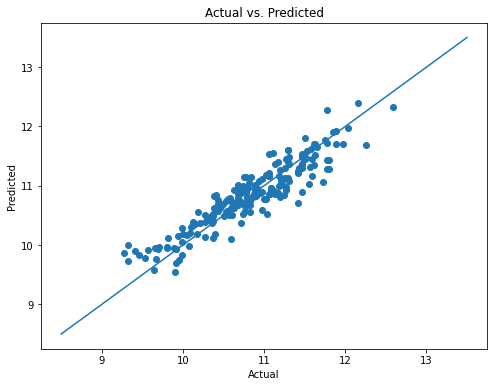

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
x = np.array([8.5, 13.5])
y = np.array([8.5, 13.5])
plt.plot(x,y)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
